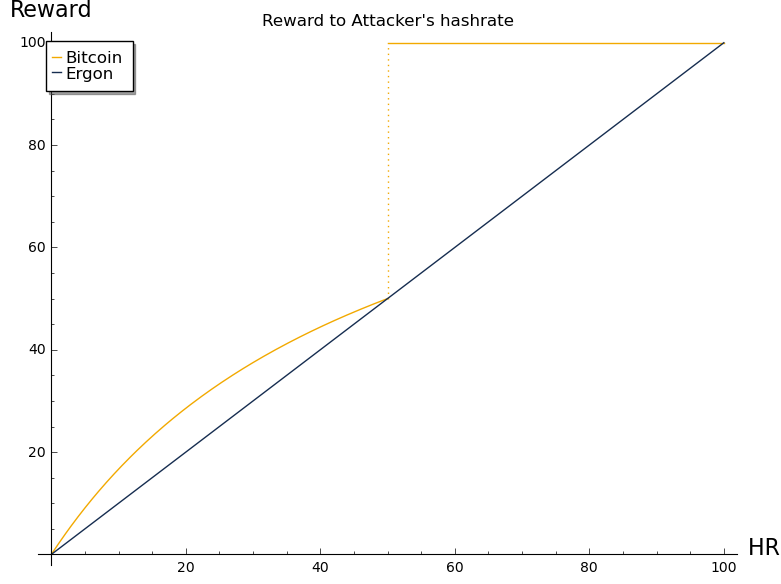

In [3]:

import matplotlib.style
matplotlib.style.use("classic")
coins=100
hr=50
p1 = plot(coins*x/(hr+x), (x,0,hr), axes_labels=['HR  ','Reward'], title='Reward to Attacker\'s hashrate', color='#F2A900', legend_label='Bitcoin')
p2 = plot(coins, (x,hr,2*hr), color='#F2A900')
l = line([(hr,coins/2), (hr,coins)], linestyle=':', rgbcolor='#F2A900')
p_ergon = plot(x, (0,2*hr), legend_label='Ergon', rgbcolor='#162d50')
full_plot=p1+p2+l+p_ergon
show(full_plot)
full_plot.save('51bitcoin_reward.png')

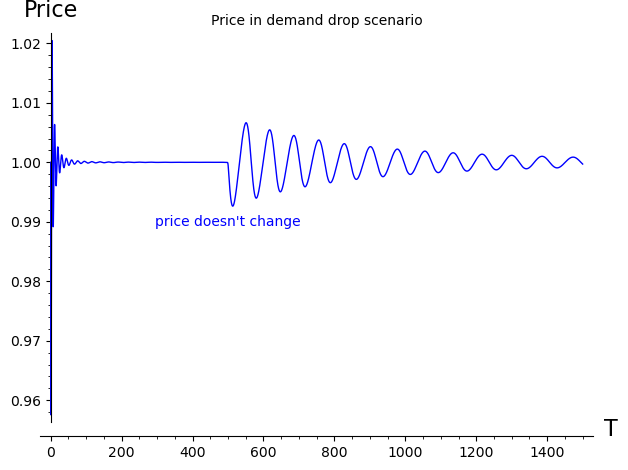

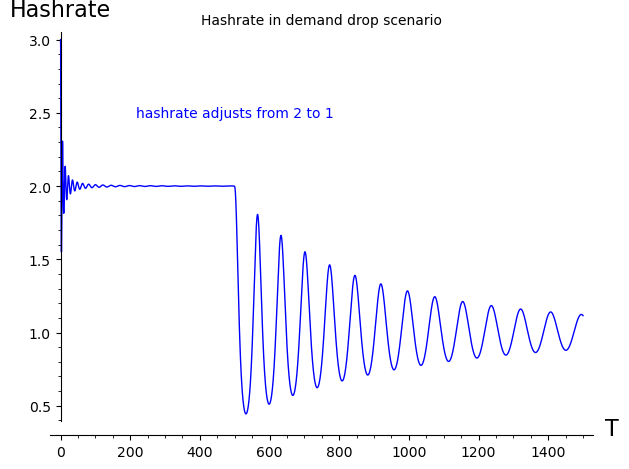

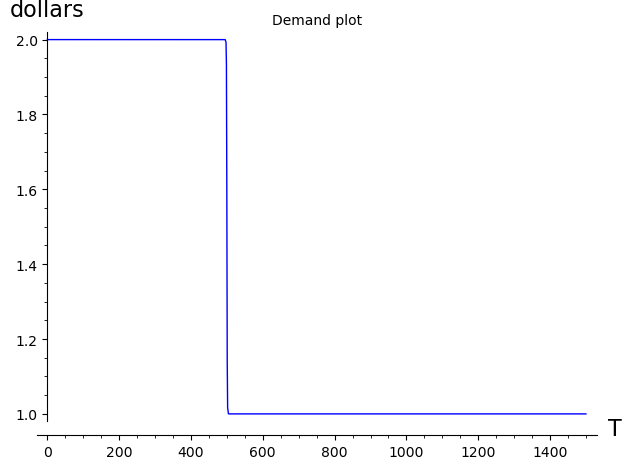

In [30]:
# Set precision
R = RealField(500)
RealNumber = R
# Define helping functions
# a kink, from zero to 1, half way on t0, smaller slope makes it more steep
step = lambda x, t0, slope: (tanh((t-t0)/slope)+1)/2
# a reverse kink, from 1 to zero
antistep = lambda x, t0, slope: (tanh((-(t-t0))/slope)+1)/2
# impulse from 0 to 1 to 0
impulse = lambda x, t0, slope: 4*step(x, t0, slope)*antistep(x, t0, slope)
# to turn factors on and off smoothly
on_off = lambda x, on, off, slope: step(x, on, slope)*antistep(x, off, slope)

tmax = 1500
moore = 3000 
moore_on = 0
# p - price
# h - hashrate
# t- time
# n - supply
# ndot - change of the supply
# cw - chain work
p, h, t, n, ndot, cw = var('p h t n ndot cw') 

# electricity cost
moore_factor = exp(-moore_on*t/(moore))
epsilon = 1* moore_factor

# miners reaction speed, how many units worth of hashes 
# can they deliver for a unit of profitability
alpha = 10

#market 
gamma = 5
damping = lambda equilibrium : -gamma*(p-equilibrium)  #market speculating on the price returning to equilibrium


#REWARD FUNCTIONS

#reward = ndot == 2                                               # Bitcoin
reward = ndot == h*moore_factor                                 # Ergon
#reward = ndot == h^0.9*moore_factor                             # 9/10 ergon, 1/10 bitcoin
#reward = ndot==((n/cw)*h)^step(t, t0=100,slope=100)*sqrt(moore_factor)# Smooth transition Bitcoin -> Ergon, 
                                                                 #t0 is the halfway

#reward = ndot == log(1+h)
#DEMAND SCENARIOS

D = 2                                      # Constant demand#
#D = 0.9                                   # Demand below initial reward
#D = 2+1*step(t, t0=300, slope=1)          # Demand jump
D = 2-1*step(t,t0=500, slope=1)         # Demand drop above coin production
#D = 2-1.5*step(t,t0=1000, slope=1)         # Demand drop below coin production
#D = 2+10*impulse(t,1000,slope=1)           # Demand impulse
#D = 2+ p*step(t, t0=200, slope=30)        # BITCOIN NGU HYPE, demand proportional to price
D=D/p                                      # Demand expressed in dollars
# Turn on for full proportional reward when an equilibrium is known
# Adds damping from speculators taking advantage of predictable ups and downs
D = D + damping(equilibrium=epsilon)                          
#D = D+ step(t, t0=200, slope=1)* damping(equilibrium=1) # Might turn on after a transition to stable equilibrium


# EQUATIONS
de1 = (p*D - p*ndot) / n                # p'=
de2 = alpha * (ndot*p - epsilon*h )     # h'=
de3 = ndot                              # n'=
de4 = h                                 # cw'=h

# apply the reward function

eq1 = de1.substitute(reward)
eq2 = de2.substitute(reward)
eq3 = de3.substitute(reward)

# INITIAL CONDITIONS
t0=0; p0=1; h0=3; n0=10; cw0=50;

# SOLVE EQUATIONS
sol_sys = desolve_system_rk4([eq1, eq2, eq3, de4], [p, h, n, cw], ics=[t0, p0, h0, n0, cw0], ivar=t,end_points=[t0,tmax])

# PLOT RESULTS
hr = [[point[0], point[2]] for point in sol_sys]
price = [[point[0], point[1]] for point in sol_sys]
supply = [[point[0], point[3]] for point in sol_sys]
show(line(price)+ text("price doesn't change", (500, 0.99)), axes_labels=['T  ','Price'], title='Price in demand drop scenario')
show(line(hr)+ text("hashrate adjusts from 2 to 1", (500, 2.5)), axes_labels=['T  ','Hashrate'], title='Hashrate in demand drop scenario')
#show(line(supply))
D = 2-1*step(t,t0=500, slope=1)
show(plot(D, (t,0, tmax)), axes_labels=['T ','dollars'], title='Demand plot')

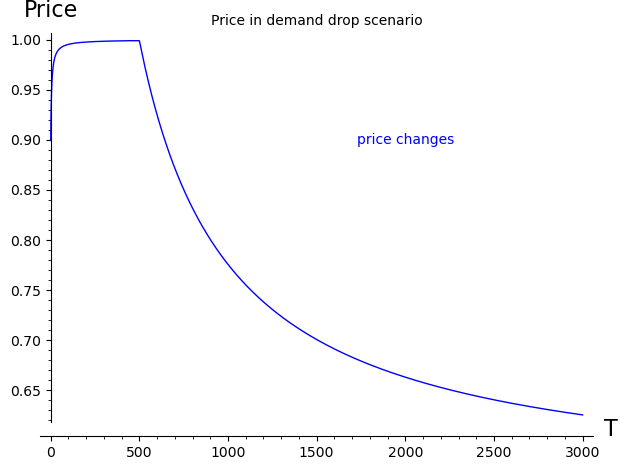

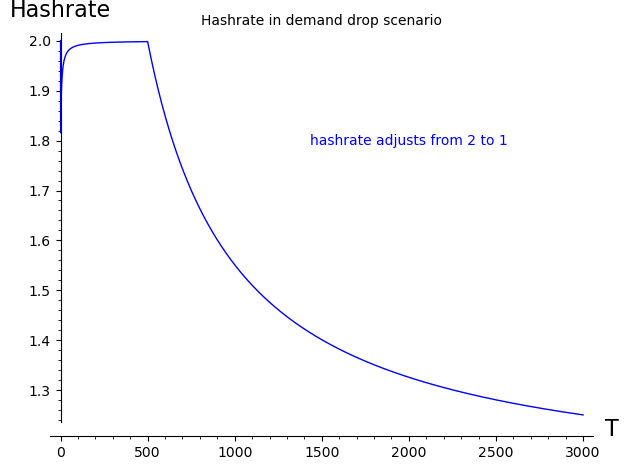

In [31]:
# Set precision
R = RealField(500)
RealNumber = R
# Define helping functions
# a kink, from zero to 1, half way on t0, smaller slope makes it more steep
step = lambda x, t0, slope: (tanh((t-t0)/slope)+1)/2
# a reverse kink, from 1 to zero
antistep = lambda x, t0, slope: (tanh((-(t-t0))/slope)+1)/2
# impulse from 0 to 1 to 0
impulse = lambda x, t0, slope: 4*step(x, t0, slope)*antistep(x, t0, slope)
# to turn factors on and off smoothly
on_off = lambda x, on, off, slope: step(x, on, slope)*antistep(x, off, slope)

tmax = 3000
moore = 3000
moore_on = 0
# p - price
# h - hashrate
# t- time
# n - supply
# ndot - change of the supply
# cw - chain work
p, h, t, n, ndot, cw = var('p h t n ndot cw') 

# electricity cost
moore_factor = exp(-moore_on*t/(moore))
epsilon = 1 * moore_factor

# miners reaction speed, how many units worth of hashes 
# can they deliver for a unit of profitability
alpha = 20

#market 
gamma = 3
damping = lambda equilibrium : -gamma*(p-equilibrium)  #market speculating on the price returning to equilibrium


#REWARD FUNCTIONS

reward = ndot == 2                                               # Bitcoin
#reward = ndot == h#*moore_factor                                 # Ergon
#reward = ndot == h^0.9*moore_factor                             # 9/10 ergon, 1/10 bitcoin
#reward = ndot==((n/cw)*h)^step(t, t0=100,slope=100)*sqrt(moore_factor)# Smooth transition Bitcoin -> Ergon, 
                                                                 #t0 is the halfway

#reward = ndot == log(1+h)

#DEMAND SCENARIOS

D = 2                                      # Constant demand#
#D = 0.9                                   # Demand below initial reward
#D = 4+1*step(t, t0=300, slope=1)          # Demand jump
D = 2-0.9*step(t,t0=500, slope=1)         # Demand drop above coin production
#D = 2-1.5*step(t,t0=1000, slope=1)         # Demand drop below coin production
#D = 2+10*impulse(t,1000,slope=1)           # Demand impulse
#D = 2+ p*step(t, t0=200, slope=30)        # BITCOIN NGU HYPE, demand proportional to price
#D=D*p                                        # Demand expressed in dollars
# Turn on for full proportional reward when an equilibrium is known
# Adds damping from speculators taking advantage of predictable ups and downs
#D = D + damping(equilibrium=epsilon)                          
#D = D+ step(t, t0=200, slope=1)* damping(equilibrium=1) # Might turn on after a transition to stable equilibrium


# EQUATIONS
de1 = (D - p*ndot) / n                # p'=
de2 = alpha * (ndot*p - epsilon*h )     # h'=
de3 = ndot                              # n'=
de4 = h                                 # cw'=h

# apply the reward function

eq1 = de1.substitute(reward)
eq2 = de2.substitute(reward)
eq3 = de3.substitute(reward)

# INITIAL CONDITIONS
t0=0; p0=0.9; h0=2; n0=10; cw0=50;

# SOLVE EQUATIONS
sol_sys = desolve_system_rk4([eq1, eq2, eq3, de4], [p, h, n, cw], ics=[t0, p0, h0, n0, cw0], ivar=t,end_points=[t0,tmax])

# PLOT RESULTS
hr = [[point[0], point[2]] for point in sol_sys]
price = [[point[0], point[1]] for point in sol_sys]
supply = [[point[0], point[3]] for point in sol_sys]
show(line(price)+ text("price changes", (2000, 0.9)), axes_labels=['T  ','Price'], title='Price in demand drop scenario')
show(line(hr)+ text("hashrate adjusts from 2 to 1", (2000, 1.8)), axes_labels=['T  ','Hashrate'], title='Hashrate in demand drop scenario')
#show(line(supply))
#show(plot(D, (t,0, tmax)))